
<div class="alert alert-info" style="background-color:#cce5ff; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px; color:black; text-align:center;font-size:40px;'>Stage 2-B</h2>
    <br>
    <h2 style='margin:10px 5px; color:black; text-align:center;font-size:40px;'>Comments Sentiment Analysis</h2>
</div>

<img src="stageb.png">

<H3>Importing python packages</H3>

In [1]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud 


<h3>Importing YouTube comments data</h3>

In [2]:
# read dataframe
stanford_comment = pd.read_parquet('comments_sentiment.parquet.gzip')


In [3]:
stanford_comment.shape

(5853342, 6)

In [4]:
#Extracting 1000000 random samples from the data
stanford_comment = stanford_comment.sample(1000000)
stanford_comment.shape

(1000000, 6)

In [5]:
stanford_comment

,comment_id,comment,user_id,video_id,new_comment,sentiment
1308522,UgxmJET5sQM6v4z9Zp14AaABAg,I envy them.......,UCZeVKI1GVlpg9bojUct4r2A,yrXE-Eb1_c4,I envy them,2
4638883,UgwMi3pWQH-mE-P0q6h4AaABAg,thats a lot of damage - looks like flex seal can fix this,UCniLvHS7DPngn9CZiZ3aBkw,6w6pEXZutoY,thats a lot of damage - looks like flex seal can fix this,2
3541416,UghJ2Wr8DUDB5ngCoAEC,Hi,UCdNC4FK5VMMDGtMGn7RYYAg,Peqj69_hZWQ,Hi,2
608861,UgyIpgA8tBuymi2roFN4AaABAg,I wanna know why I&#39;ve never considered the OnePlus 7 before. It looks so fine!,UCyTZVrVmJmlkEuJ0gTsSf7w,zsEcLVHnxUM,I wanna know why I&#39;ve never considered the OnePlus 7 before It looks so fine!,2
4881133,Ugw_TzctYxfABRZUpT94AaABAg,mark ass brownie,UC5CkPwZmqAoW4IyXl3ezy2A,-YFKqKdD3_A,mark ass brownie,2
...,...,...,...,...,...,...
975394,UggQ7AsKb8FX8XgCoAEC,what to do with stuff ur done reviewing ? just giveaway.. I mean would like to use s6 or oneplus 2 than my retarded lumia 535..,UCs3RaBEAU2aDsEaICfgb9iw,tXp-_3jvKsI,what to do with stuff ur done reviewing ? just giveaway I mean would like to use s6 or oneplus 2 than my retarded lumia 535,2
4602352,Ugz3WjXHyeZCOhyfl4x4AaABAg,this or the SE everyone?,UCK7gZPeTLUVqvCQi9TV9MXw,dlHnleQU9tQ,this or the SE everyone?,2
673288,UgwISd3hzHPUFd8-lF14AaABAg,Congratulations sir. You have 1M subscribers🙌🙌🔥🔥🔥,UC4So1QKcKzUprJHsDPiVUYQ,XKD2WzAscW8,Congratulations sir You have 1M subscribers🙌🙌🔥🔥🔥,2
3154591,UghjcZ28I86eh3gCoAEC,DDR3 ??? WTF !!,UCr4RqCSwbZug72dUOUzV0MQ,Dq-bg7uXcYo,DDR3 ??? WTF !!,2


In [6]:
stanford_comment.nunique()

comment_id     992414
comment        940735
user_id        714706
video_id         4497
new_comment    940548
sentiment           5
dtype: int64

In [16]:
#Convert sentiment from obeject to int
stanford_comment['sentiment'].dtypes
stanford_comment['sentiment'] = pd.to_numeric(stanford_comment['sentiment'], errors='coerce')

In [17]:
def polt_words(all_words):
    
    """
    Plotting the frequencies of words
    in the positive, negative, and neutral case
    """
    
    wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_posi, interpolation="bilinear")
    plt.axis('off')
    plt.show()

<div class="alert alert-info" style="background-color:#cce5ff; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px; color:black; text-align:center;font-size:25px;'>Displaying Positive Comments</h2>
    </div>


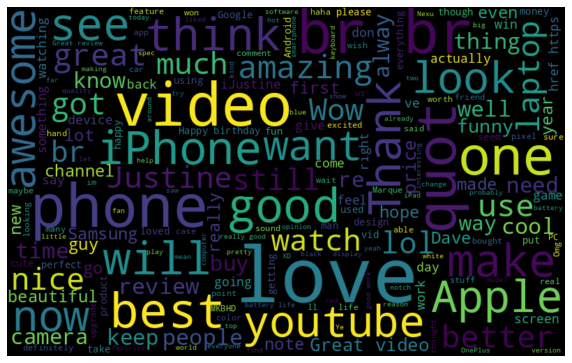

In [9]:
#Displaying the POSITIVE comments
all_words_posi = ' '.join([text for text in stanford_comment['new_comment'][stanford_comment.sentiment > 2]])
polt_words(all_words_posi)

<div class="alert alert-info" style="background-color:#cce5ff; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px; color:black; text-align:center;font-size:25px;'>Displaying NEUTRAL Comments</h2>
    </div>


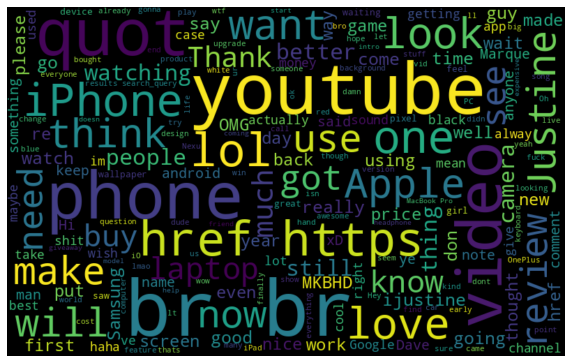

In [10]:
#Displaying the NEUTRAL comments
all_words_neutral = ' '.join([text for text in stanford_comment['new_comment'][stanford_comment.sentiment == 2]])
polt_words(all_words_neutral)

<div class="alert alert-info" style="background-color:#cce5ff; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px; color:black; text-align:center;font-size:25px;'>Displaying Negative Comments</h2>
    </div>


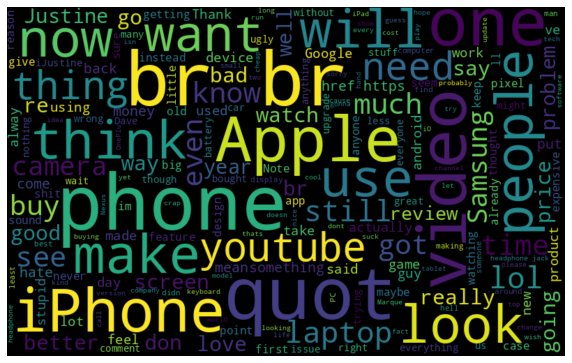

In [11]:
#Displaying the NEUTRAL comments
all_words_neg = ' '.join([text for text in stanford_comment['new_comment'][stanford_comment.sentiment < 2]])
polt_words(all_words_neg)

<div class="alert alert-info" style="background-color:#cce5ff; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px; color:black; text-align:center;font-size:25px;'>Displaying the distribution of sentiment</h2>

2.0    598942
3.0    209672
1.0    180450
4.0      9087
0.0      1554
Name: sentiment, dtype: int64

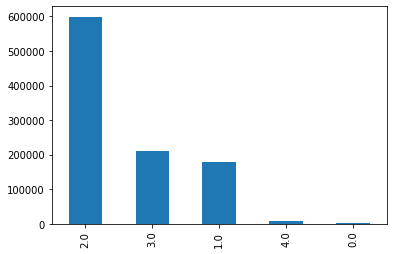

In [12]:
stanford_comment.sentiment.value_counts().plot.bar()
stanford_comment.sentiment.value_counts()

<p class="alert alert-block alert-success">From our above analyis, we can conclude that there were around 250k positive comments, around 180k negative comments, and a little less than 600k neutral comments

<div class="alert alert-info" style="background-color:#cce5ff; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px; color:black; text-align:center;font-size:25px;'>Displaying the percantage of the Positive/Nuetral/Negative comments</h2>

In [19]:
# get the percantage of the positive comments
print("Positive Percentage",stanford_comment[stanford_comment['sentiment'] > 2].shape[0]/stanford_comment.shape[0])

# get the percantage of the Nuetral comments
print("Nuetral Percentage",stanford_comment[stanford_comment['sentiment'] == 2].shape[0]/stanford_comment.shape[0])


# get the percantage of the Negative comments
print("Negative Percentage",stanford_comment[stanford_comment['sentiment'] < 2].shape[0]/stanford_comment.shape[0])



Positive Percentage 0.218759
Nuetral Percentage 0.598942
Negative Percentage 0.182004
